# 1. EDA:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.dates as mpl_dates

#The raw dataset
df = pd.read_csv('data/SolarPredictionFixed2.csv', parse_dates=["Data"])
df = df.sort_values(['UNIXTime'], ascending = [True])

/var/folders/vl/4dfnvm4n2lzg3h22r3bfl4km0000gp/T/ipykernel_7747/3916450928.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('data/SolarPredictionFixed2.csv', parse_dates=["Data"])


In [4]:
df

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
7679,1472724008,2016-09-01,00:00:08,2.58,51.0,30.43,103.0,77.27,11.25,06:07:00,18:38:00
7678,1472724310,2016-09-01,00:05:10,2.83,51.0,30.43,103.0,153.44,9.00,06:07:00,18:38:00
7677,1472725206,2016-09-01,00:20:06,2.16,51.0,30.43,103.0,142.04,7.87,06:07:00,18:38:00
7676,1472725505,2016-09-01,00:25:05,2.21,51.0,30.43,103.0,144.12,18.00,06:07:00,18:38:00
7675,1472725809,2016-09-01,00:30:09,2.25,51.0,30.43,103.0,67.42,11.25,06:07:00,18:38:00
...,...,...,...,...,...,...,...,...,...,...,...
25052,1483263302,2016-12-31,23:35:02,1.22,41.0,30.34,83.0,238.94,6.75,06:57:00,17:54:00
25051,1483263601,2016-12-31,23:40:01,1.21,41.0,30.34,82.0,236.79,5.62,06:57:00,17:54:00
25050,1483263904,2016-12-31,23:45:04,1.21,42.0,30.34,81.0,218.28,7.87,06:57:00,17:54:00
25049,1483264203,2016-12-31,23:50:03,1.19,41.0,30.34,80.0,215.23,7.87,06:57:00,17:54:00


In [5]:
#Cleaning the data into a new dataset with non-timestamp formats
df_clean = pd.read_csv('data/SolarPredictionFixed2.csv', parse_dates=["Data"])
df_clean = df_clean.sort_values(['UNIXTime'], ascending = [True])

#Creating new Year, Month, and Day columns
df_clean['Year'] = df['Data'].dt.year
df_clean['Month'] = df['Data'].dt.month
df_clean['Day'] = df['Data'].dt.day

#Creating new Hour, Minute, and Second columns
df_clean['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')
df_clean['Hour'] = df_clean['Time'].dt.hour
df_clean['Minute'] = df_clean['Time'].dt.minute
df_clean['Second'] = df_clean['Time'].dt.second

df_clean['TotalMinutes'] = df_clean['Hour'] * 60 + df_clean['Minute']
df_clean['TotalSeconds'] = df_clean['TotalMinutes'] * 60 + df_clean['Second']

#Creating a new DayLength column
df_clean['TimeSunRise'] = pd.to_datetime(df['TimeSunRise'], format='%H:%M:%S')
df_clean['TimeSunSet'] = pd.to_datetime(df['TimeSunSet'], format='%H:%M:%S')

df_clean['DayLength'] =  df_clean['TimeSunSet'] - df_clean['TimeSunRise']
df_clean['DayLengthSeconds'] = df_clean['DayLength'] / pd.Timedelta(seconds=1)

#Drop 'Data', 'Time', 'Year', 'TimeSunRise', 'TimeSunSet', 'Minute', 'Second', 'DayLength'
df_clean = df_clean.drop(['Data','Time','Year', 'Minute', 'Second', 'TimeSunRise','TimeSunSet', 'DayLength'], axis=1)
print('Before missing values dropped:', df_clean.shape)
#Drop missing values
df_clean = df_clean.dropna()

print('After missing values dropped:', df_clean.shape)

/var/folders/vl/4dfnvm4n2lzg3h22r3bfl4km0000gp/T/ipykernel_7747/2620513347.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_clean = pd.read_csv('data/SolarPredictionFixed2.csv', parse_dates=["Data"])


Before missing values dropped: (33738, 13)
After missing values dropped: (32686, 13)


In [6]:
#Features
print("Cleaned Dataframe:")
print("Head:", "\n", df_clean.head(), "\n")
print("Shape:", df_clean.shape, "\n")
print("Describe:", "\n", df_clean.describe(), "\n")
print("Datatypes:", "\n", df_clean.dtypes, "\n")
print("Start and stop dates:", df["Data"].min())
print(df["Data"].max())
print("Length:", df["Data"].max()-df["Data"].min())

Cleaned Dataframe:
Head: 
         UNIXTime  Radiation  Temperature  Pressure  Humidity  \
7679  1472724008       2.58         51.0     30.43     103.0   
7678  1472724310       2.83         51.0     30.43     103.0   
7677  1472725206       2.16         51.0     30.43     103.0   
7676  1472725505       2.21         51.0     30.43     103.0   
7675  1472725809       2.25         51.0     30.43     103.0   

      WindDirection(Degrees)  Speed  Month  Day  Hour  TotalMinutes  \
7679                   77.27  11.25      9    1     0             0   
7678                  153.44   9.00      9    1     0             5   
7677                  142.04   7.87      9    1     0            20   
7676                  144.12  18.00      9    1     0            25   
7675                   67.42  11.25      9    1     0            30   

      TotalSeconds  DayLengthSeconds  
7679             8           45060.0  
7678           310           45060.0  
7677          1206           45060.0  
7676 

In [7]:
#Create a new df1, which is df indexed by date
df1 = df.set_index("Data")
print(df1)

print("Mean temp:", df1["Temperature"].mean())

mean_temp_months = df1["Temperature"].resample('M').mean()
mean_temp_weeks = df1["Temperature"].resample('W').mean()
mean_radiation_months = df1["Radiation"].resample('M').mean()
mean_radiation_weeks = df1["Radiation"].resample('W').mean()
mean_radiation_days = df1["Radiation"].resample('D').mean()

              UNIXTime      Time  Radiation  Temperature  Pressure  Humidity  \
Data                                                                           
2016-09-01  1472724008  00:00:08       2.58         51.0     30.43     103.0   
2016-09-01  1472724310  00:05:10       2.83         51.0     30.43     103.0   
2016-09-01  1472725206  00:20:06       2.16         51.0     30.43     103.0   
2016-09-01  1472725505  00:25:05       2.21         51.0     30.43     103.0   
2016-09-01  1472725809  00:30:09       2.25         51.0     30.43     103.0   
...                ...       ...        ...          ...       ...       ...   
2016-12-31  1483263302  23:35:02       1.22         41.0     30.34      83.0   
2016-12-31  1483263601  23:40:01       1.21         41.0     30.34      82.0   
2016-12-31  1483263904  23:45:04       1.21         42.0     30.34      81.0   
2016-12-31  1483264203  23:50:03       1.19         41.0     30.34      80.0   
2016-12-31  1483264501  23:55:01       1

<function matplotlib.pyplot.show(close=None, block=None)>

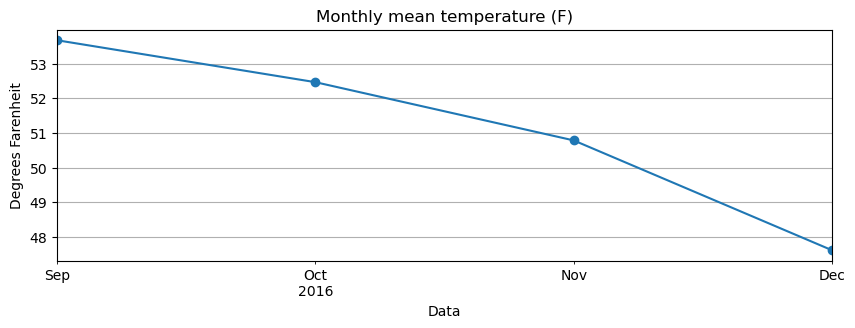

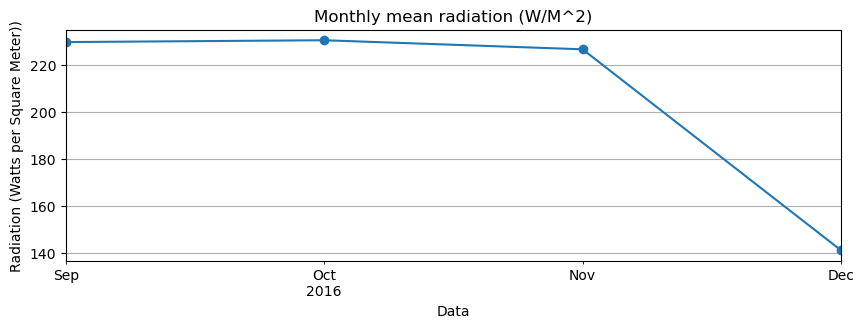

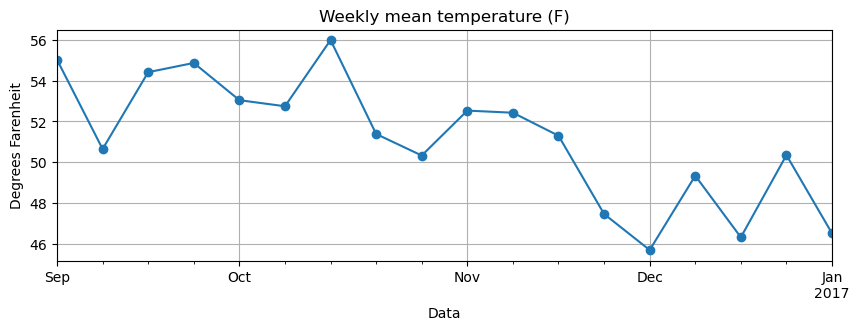

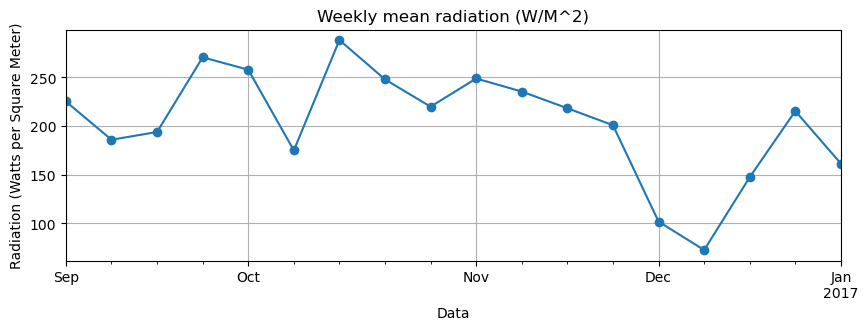

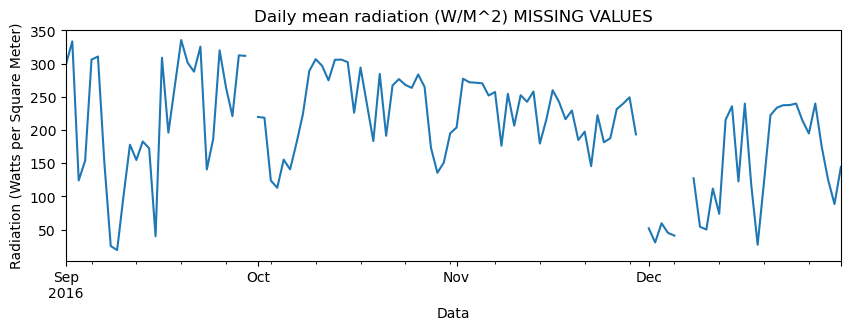

In [8]:
#Monthly mean temp plot
plt.figure(figsize=(10,3))
plt.title("Monthly mean temperature (F)")
plt.ylabel('Degrees Farenheit')
mean_temp_months.plot(marker='o', linestyle='-')
plt.grid(True)
plt.show

#Monthly mean radiation plot
plt.figure(figsize=(10,3))
plt.title("Monthly mean radiation (W/M^2)")
plt.ylabel('Radiation (Watts per Square Meter))')
mean_radiation_months.plot(marker='o', linestyle='-')
plt.grid(True)
plt.show


#Weekly mean temp hist
plt.figure(figsize=(10,3))
plt.title("Weekly mean temperature (F)")
plt.ylabel('Degrees Farenheit')
mean_temp_weeks.plot(marker='o', linestyle='-')
plt.grid(True)
plt.show

#Weekly mean radiation hist
plt.figure(figsize=(10,3))
plt.title("Weekly mean radiation (W/M^2)")
plt.ylabel('Radiation (Watts per Square Meter)')
mean_radiation_weeks.plot(marker='o', linestyle='-')
plt.grid(True)
plt.show

#Daily mean radiation hist
plt.figure(figsize=(10,3))
plt.title("Daily mean radiation (W/M^2) MISSING VALUES")
plt.ylabel('Radiation (Watts per Square Meter)')
mean_radiation_days.plot(linestyle='-')
plt.show

In [9]:
#The missing values
print(mean_radiation_days["2016-9-30"])
print(mean_radiation_days["2016-11-30"])
print(mean_radiation_days["2016-12-6"])
print(mean_radiation_days["2016-12-7"])

nan
nan
nan
nan


Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.


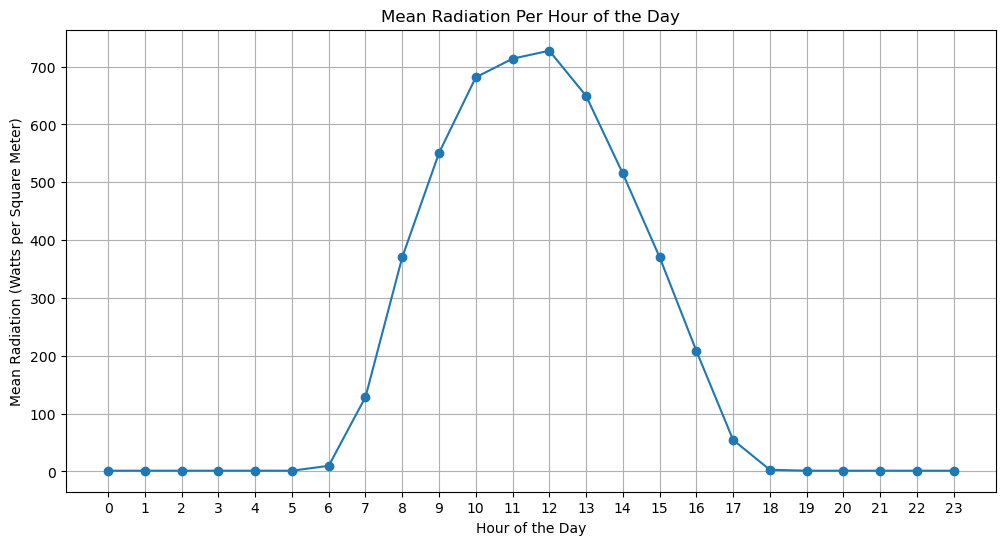

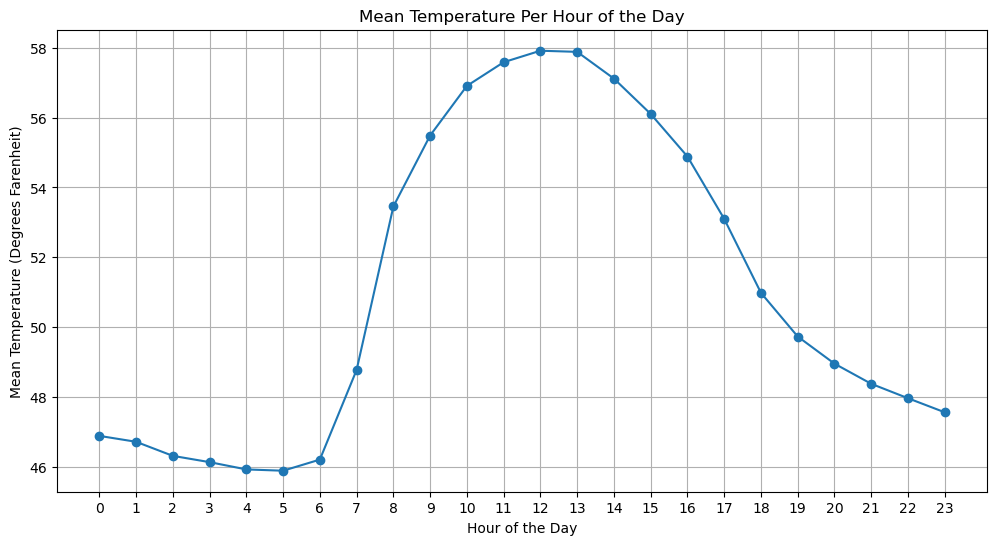

In [250]:
#Index by Hour of day
df1_hour_of_day = df.set_index("Time")

#Set to datetime
df1_hour_of_day.index = pd.to_datetime(df1_hour_of_day.index)

#Radiation Hourly means
hourly_means_rad = df1_hour_of_day["Radiation"].resample('H').mean()

#Temperature Hourly means
hourly_means_temp = df1_hour_of_day["Temperature"].resample('H').mean()


#Mean Radiation by hour of day
plt.figure(figsize=(12, 6))
plt.plot(hourly_means_rad.index.hour, hourly_means_rad, marker='o', linestyle='-')
plt.xlabel('Hour of the Day')
plt.ylabel('Mean Radiation (Watts per Square Meter)')
plt.title('Mean Radiation Per Hour of the Day')
plt.xticks(np.arange(24))
plt.grid(True)
plt.savefig('EDA_MeanRadiation.png', bbox_inches='tight', dpi=300)
plt.show()

#Mean Temperature by hour of day
plt.figure(figsize=(12, 6))
plt.plot(hourly_means_temp.index.hour, hourly_means_temp, marker='o', linestyle='-')
plt.xlabel('Hour of the Day')
plt.ylabel('Mean Temperature (Degrees Farenheit)')
plt.title('Mean Temperature Per Hour of the Day')
plt.xticks(np.arange(24))
plt.grid(True)
plt.savefig('EDA_MeanTemp.png', bbox_inches='tight', dpi=300)

plt.show()

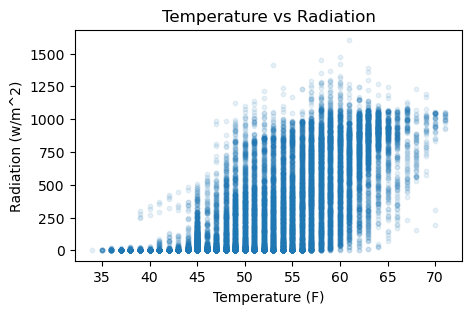

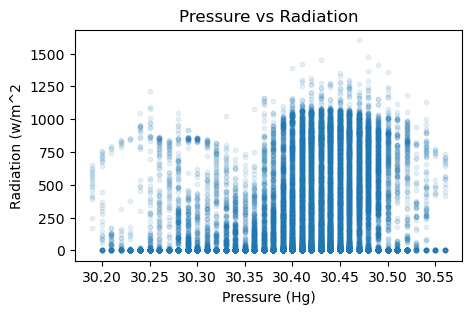

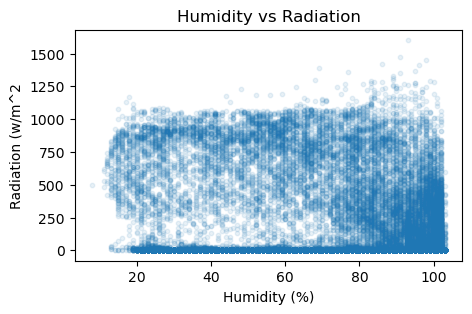

In [251]:
#ScatterPlot Temperature vs Radiation
df.plot.scatter('Temperature','Radiation',figsize=(5,3),alpha=0.1,s=10) # alpha=0.1,s=10
plt.title("Temperature vs Radiation")
plt.xlabel('Temperature (F)')
plt.ylabel('Radiation (w/m^2)')
plt.savefig('EDA_TempRad.png', bbox_inches='tight', dpi=300)
plt.show()

#ScatterPlot Pressure vs Radiation
df.plot.scatter('Pressure','Radiation',figsize=(5,3),alpha=0.1,s=10) # alpha=0.1,s=10
plt.title("Pressure vs Radiation")
plt.xlabel('Pressure (Hg)')
plt.ylabel('Radiation (w/m^2')
plt.show()

#ScatterPlot Humidity vs Radiation
df.plot.scatter('Humidity','Radiation',figsize=(5,3),alpha=0.1,s=10) # alpha=0.1,s=10
plt.title("Humidity vs Radiation")
plt.xlabel('Humidity (%)')
plt.ylabel('Radiation (w/m^2')
plt.show()

In [64]:
#Add 3 hours lag, assuming predicting next hour

#Autoregression features

y1 = df_clean['Radiation']
X1 = pd.concat([df_clean['Radiation'].shift(12),df_clean['Radiation'].shift(12),df_clean['Radiation'].shift(12)],axis=1)
X1.columns = ['lag_36_pts','lag_24_pts','lag_12_pts']
print(X1.tail(10))
print(y1.tail(10))
df_clean_lag = pd.concat([df_clean, X1], axis=1)
df_clean_lag = df_clean_lag.dropna()
print(df_clean_lag)

       lag_36_pts  lag_24_pts  lag_12_pts
25057        1.21        1.21        1.21
25056        1.20        1.20        1.20
25055        1.18        1.18        1.18
25054        1.21        1.21        1.21
25053        1.23        1.23        1.23
25052        1.20        1.20        1.20
25051        1.20        1.20        1.20
25050        1.20        1.20        1.20
25049        1.22        1.22        1.22
25048        1.22        1.22        1.22
25057    1.20
25056    1.18
25055    1.22
25054    1.19
25053    1.20
25052    1.22
25051    1.21
25050    1.21
25049    1.19
25048    1.21
Name: Radiation, dtype: float64
         UNIXTime  Radiation  Temperature  Pressure  Humidity  \
7667   1472728803       2.06         51.0     30.42     103.0   
7666   1472729106       3.55         51.0     30.42     103.0   
7665   1472729408       3.63         52.0     30.41     103.0   
7664   1472729704       3.76         52.0     30.41     103.0   
7663   1472730007       3.25         52.0

<Figure size 1200x800 with 0 Axes>

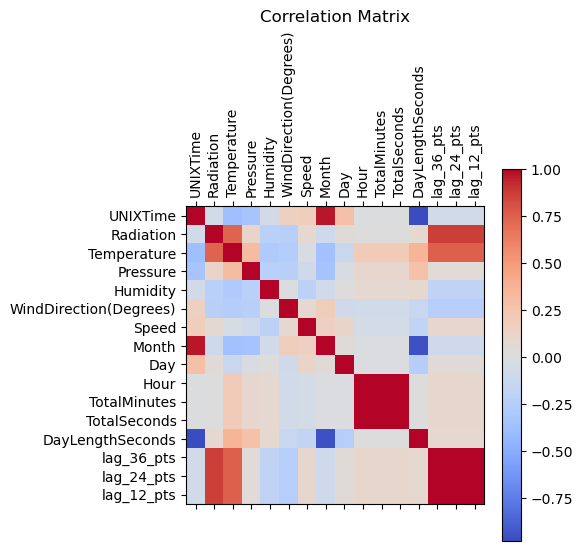

In [258]:
#Correlation matrix
correlation_matrix = df_clean_lag.corr()

#Plot the correlation matrix using Matplotlib
plt.figure(figsize=(12, 8))
cax = plt.matshow(correlation_matrix, cmap="coolwarm")
plt.colorbar(cax)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title("Correlation Matrix")
plt.savefig('EDA_CorrMatrix.png', bbox_inches='tight', dpi=300)
plt.show()

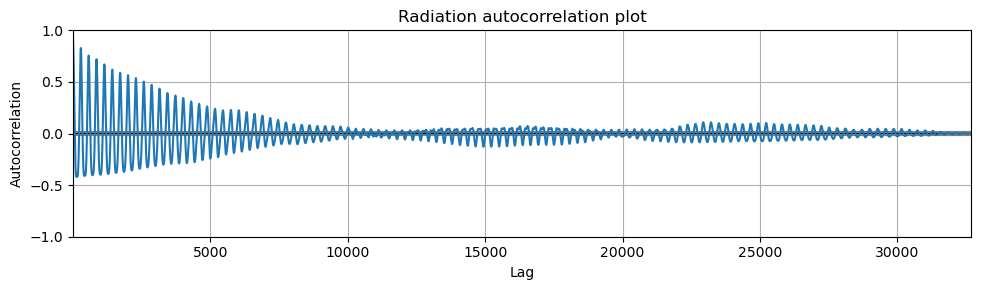

In [259]:
# Autocorrelation
plt.figure(figsize=(10,3))

pd.plotting.autocorrelation_plot(df_clean['Radiation'])
plt.title("Radiation autocorrelation plot")
plt.tight_layout()
plt.savefig('EDA_AutoCorrelation.png', bbox_inches='tight', dpi=300)

plt.show()

# 2. Splitting and Preprocessing:

In [66]:
# Splitting into other and test (90% and 10%)

print("Train Test Split into Other and Test (90% and 10%):")


from sklearn.model_selection import train_test_split

X = df_clean_lag.loc[:, df_clean_lag.columns != 'Radiation']
y = df_clean_lag['Radiation']

X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

print("Other shape:", X_other.shape)
print("Test shape:", X_test.shape, "\n")

# Splitting "other" into train and validation using TimeSeriesSplit

from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits=5)

print("TimeSeriesSplit of Other into Train and Validation (5 Folds):")
fold = 0

for train_index, val_index in tss.split(X_other):
    X_train, X_val = X_other.iloc[train_index], X_other.iloc[val_index]
    y_train, y_val = y_other.iloc[train_index], y_other.iloc[val_index]
    #print(np.unique(y_other, return_counts = True))
    fold = fold + 1
    print("Train Fold #", fold, X_train.shape, ";","Val Fold #", fold, X_val.shape)


Train Test Split into Other and Test (90% and 10%):
Other shape: (29406, 15)
Test shape: (3268, 15) 

TimeSeriesSplit of Other into Train and Validation (5 Folds):
Train Fold # 1 (4901, 15) ; Val Fold # 1 (4901, 15)
Train Fold # 2 (9802, 15) ; Val Fold # 2 (4901, 15)
Train Fold # 3 (14703, 15) ; Val Fold # 3 (4901, 15)
Train Fold # 4 (19604, 15) ; Val Fold # 4 (4901, 15)
Train Fold # 5 (24505, 15) ; Val Fold # 5 (4901, 15)


In [67]:
#Missing values
print('data dimensions:',X_train.shape)
perc_missing_per_ftr = X_train.isnull().sum(axis=0)/X_train.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
print('data types of the features with missing values:')
print(X_train[perc_missing_per_ftr[perc_missing_per_ftr > 0].index].dtypes)
frac_missing = sum(X_train.isnull().sum(axis=1)!=0)/X_train.shape[0]
print('fraction of points with missing values:',frac_missing)

data dimensions: (24505, 15)
fraction of missing values in features:
Series([], dtype: float64)
data types of the features with missing values:
Series([], dtype: object)
fraction of points with missing values: 0.0


In [68]:
print(X_train.dtypes)

UNIXTime                    int64
Temperature               float64
Pressure                  float64
Humidity                  float64
WindDirection(Degrees)    float64
Speed                     float64
Month                       int32
Day                         int32
Hour                        int32
TotalMinutes                int32
TotalSeconds                int32
DayLengthSeconds          float64
lag_36_pts                float64
lag_24_pts                float64
lag_12_pts                float64
dtype: object


In [70]:
#Preprocessing using Standard Encoder and OrdinalEncoder

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

cat_ftrs = ['UNIXTime','Temperature','Pressure','Humidity','WindDirection(Degrees)',\
            'Speed','Day','Hour','TotalMinutes','TotalSeconds',	'DayLengthSeconds','lag_36_pts','lag_24_pts','lag_12_pts']
ordinal_cats = [['9','10','11','12']]
ordinal_ftrs = ['Month']

# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
        ('std', StandardScaler(), cat_ftrs)])

# 4. ML:

In [129]:
#FUNCTION
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import TimeSeriesSplit, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.inspection import permutation_importance
import pickle


def MLpipe_TSS_RMSE(X, y, preprocessor, ML_algo, param_grid):
    if ML_algo==SVR or ML_algo==XGBRegressor:
        nr_states = 1
    else:
        nr_states = 3
    test_scores = np.zeros(nr_states)
    best_models = []
    final_models = []
    perm_importances = []
    ridge_feature_importances = []
    
    for i in range(nr_states):
        # split into other and test
        X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)
    
        # split other into train and val using TimeSeriesSplit
        tss = TimeSeriesSplit(n_splits=5)

        #Setting random states
        if ML_algo==RandomForestRegressor or ML_algo==XGBRegressor or ML_algo==Ridge:
            my_model = ML_algo(random_state=7*i)
        else:
            my_model = ML_algo()

        
        #Pipeline
        pipe = make_pipeline(preprocessor, my_model)

        # GridSearchCV
        grid = GridSearchCV(pipe, param_grid=param_grid, scoring='neg_mean_squared_error',
                            cv=tss, return_train_score=True, n_jobs=-1, verbose=True)

        # fit the model on training set
        grid.fit(X_train, y_train)

        # save results into a data frame (print)
        results = pd.DataFrame(grid.cv_results_)
            
        print('best model parameters:', grid.best_params_)
        #save model to final models
        final_models.append(grid)

        # calculate permutation importance
        if ML_algo in [XGBRegressor, SVR, RandomForestRegressor]:
            perm_importance = permutation_importance(final_models[-1], X_test, y_test, n_repeats=10, random_state=42)
            print('Permutation Importance:', perm_importance.importances_mean)
            print('Permutation Importance Std:', perm_importance.importances_std)
            perm_importances.append(perm_importance)

        if ML_algo == Ridge:
            coefficients = grid.best_estimator_.named_steps['ridge'].coef_
            ridge_feature_importances.append(np.abs(coefficients))     

        #save best models
        best_models.append(grid.best_estimator_)
        best_model = grid.best_estimator_
        
        y_test_pred = final_models[-1].predict(X_test)
        test_scores[i] = (np.sqrt(mean_squared_error(y_test, y_test_pred)))
        print('validation score:', grid.best_score_)
        print('validation score (RMSE):', np.sqrt(-grid.best_score_))
        print('test score:', test_scores[i])     

        # Access the fitted preprocessor from the best model
        fitted_preprocessor = best_model.named_steps['columntransformer']
        # Get the feature names after preprocessing
        feature_names = fitted_preprocessor.get_feature_names_out()

    best_model_index = np.argmin(test_scores)
    
    return test_scores, final_models, best_models, best_models[best_model_index], y_test_pred, X_test, y_test, perm_importances, ridge_feature_importances, fitted_preprocessor


In [131]:
#RUNNING MODELS
param_dist_regr = {
    'randomforestregressor__n_estimators': [25, 30, 50],
    'randomforestregressor__max_depth': [20, 25, 30, 50]
}

param_grid_xgboost = {"xgbregressor__learning_rate": [0.01, 0.03],
              "xgbregressor__n_estimators": [1000],
              "xgbregressor__seed": [0],
              "xgbregressor__missing": [np.nan], 
              "xgbregressor__max_depth": [3, 6],
              "xgbregressor__colsample_bytree": [0.8, 0.9, 1.0],              
              "xgbregressor__subsample": [0.66, 0.8, 1.0]}

param_grid_svr = {
    'svr__kernel': ['linear', 'rbf'],
    'svr__gamma': [1e-3, 1e-1, 1e1],
    'svr__C': [1e-1, 1e0, 1e1]
}

param_grid_ridge = {
        'ridge__alpha': [10, 100,1000],
            'ridge__max_iter': [10000, 100000, 1000000]
            }

models = [Ridge, RandomForestRegressor, XGBRegressor, SVR]
#models = [Ridge]
param_grids = [param_grid_ridge, param_dist_regr, param_grid_xgboost, param_grid_svr]
#param_grids = [param_grid_ridge]
mean_test_scores = np.zeros(len(models))
sd_test_scores = np.zeros(len(models))

model_names = ['L2 Ridge','RF','XGBR','SVR']
#model_names = ['L2 Ridge']


for i in range(len(models)):
    model=models[i]


    
    param_grid=param_grids[i]
    test_scores, final_models, best_models, best_model, y_test_pred, X_test, y_test, perm_importances, ridge_feature_importances, \
        fitted_preprocessor = MLpipe_TSS_RMSE(X, y, preprocessor, ML_algo=model, param_grid=param_grid)
    mean_test_scores[i] = np.mean(test_scores)
    sd_test_scores[i] = np.std(test_scores)
    print('Test Mean:', np.mean(test_scores))
    print('Test STD"', np.std(test_scores))

    #Save each model name of the model
    model_name = f'{model.__name__}_grid'
    file_path = f'results/{model_name}.save'
    file = open(file_path, 'wb')
    pickle.dump((best_models, X_test, y_test), file)
    file.close()
    
    

Fitting 5 folds for each of 9 candidates, totalling 45 fits
best model parameters: {'ridge__alpha': 1000, 'ridge__max_iter': 10000}
validation score: -25183.251587831917
validation score (RMSE): 158.6923173560457
test score: 135.1072080748984
Fitting 5 folds for each of 9 candidates, totalling 45 fits
best model parameters: {'ridge__alpha': 1000, 'ridge__max_iter': 10000}
validation score: -25183.251587831917
validation score (RMSE): 158.6923173560457
test score: 135.1072080748984
Fitting 5 folds for each of 9 candidates, totalling 45 fits
best model parameters: {'ridge__alpha': 1000, 'ridge__max_iter': 10000}
validation score: -25183.251587831917
validation score (RMSE): 158.6923173560457
test score: 135.1072080748984
Test Mean: 135.1072080748984
Test STD" 0.0
Fitting 5 folds for each of 12 candidates, totalling 60 fits
best model parameters: {'randomforestregressor__max_depth': 50, 'randomforestregressor__n_estimators': 50}
Permutation Importance: [    0.         23385.88371469   701

In [132]:
perm_importances[0].importances_std

array([3.24383972e-01, 2.57669387e+00, 4.49880685e+00, 6.50236605e-01,
       2.10594974e-02, 4.99376178e-02, 0.00000000e+00, 1.16516227e+00,
       1.16042924e+00, 9.92791197e-01, 1.06249924e-01, 7.01859294e-02,
       5.92485925e+02, 5.92485925e+02, 5.92485925e+02])

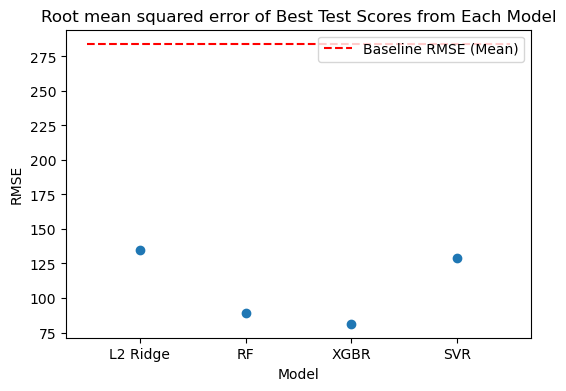

In [133]:
#adding up final test scores
mean_test_scores_final = []
mean_test_scores_final.append(mean_test_scores)

#flatten
mean_test_scores_final_flat = [item for sublist in mean_test_scores_final for item in sublist]

#can remove, model names

#calculate baseline (mean)
baseline_prediction = np.mean(y)

baseline_rmse = np.sqrt(mean_squared_error(y_test, np.full_like(y_test, baseline_prediction)))

plt.figure(figsize=(6, 4))
plt.errorbar(model_names, mean_test_scores_final_flat, yerr=sd_test_scores, fmt='o')
plt.hlines(baseline_rmse, xmin=-0.5, xmax=len(model_names) - 0.5, colors='r', linestyles='dashed', label='Baseline RMSE (Mean)')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.legend()
plt.title('Root mean squared error of Best Test Scores from Each Model')
#plt.tight_layout()
plt.savefig('linear_regression_plot2.png', bbox_inches='tight', dpi=300)

plt.show()



### Global Feature Importances

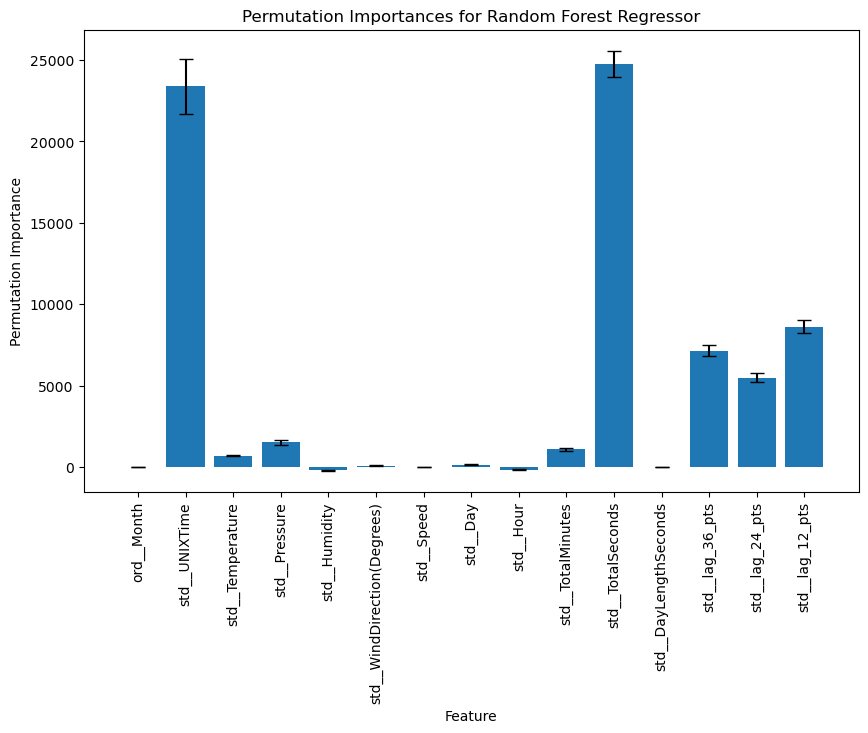

In [140]:
#Perm importances RFR
feature_names = fitted_preprocessor.get_feature_names_out()

#RFR_feature_importances = perm_importances[0].importances_mean

RFR_feature_importances = [0.0, 23385.88371469, 701.30563511, 1521.66314888, -195.23663083, 70.23799274, 0.0, 139.63496513, -150.1839226, 1083.19795989, 24755.06557811, 0.0, 7159.79313421, 5502.78338554, 8627.96634906]

RFR_std = [0.0, 1673.00650946, 45.37963212, 163.85231921, 26.92010643, 29.50959314, 0.0, 40.67628627, 27.65250755, 82.48064097, 819.96414266, 0.0, 333.19857247, 280.63479698, 412.74381595]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(RFR_feature_importances)), RFR_feature_importances, yerr=RFR_std, capsize = 5, align="center")
plt.xticks(range(len(RFR_feature_importances)), feature_names, rotation='vertical')
plt.xlabel("Feature")
plt.ylabel("Permutation Importance")
plt.title("Permutation Importances for Random Forest Regressor")
plt.savefig('PI_RFR3.png', bbox_inches='tight', dpi=300)
plt.show()

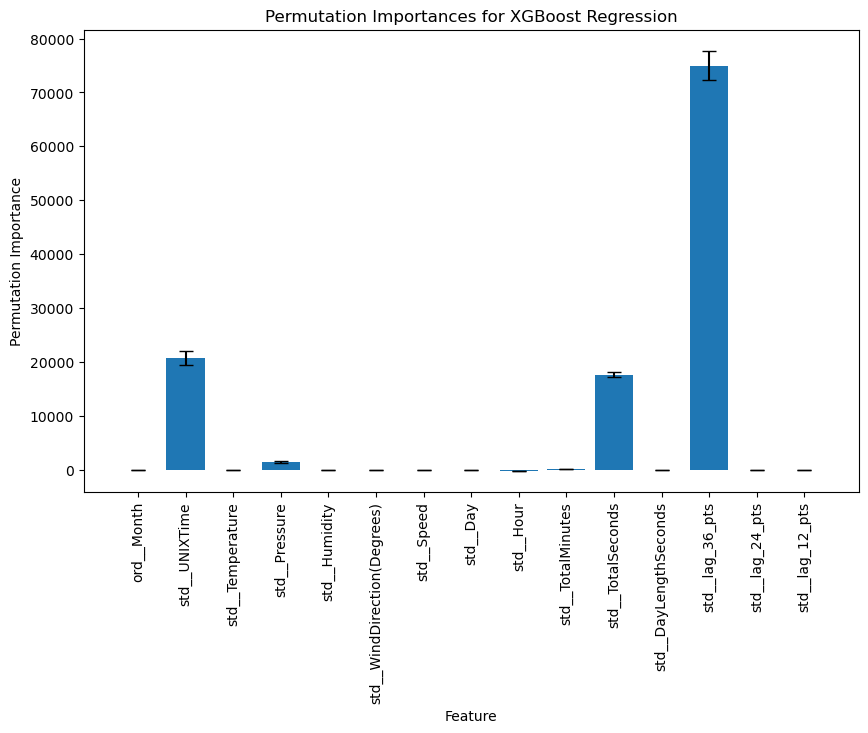

In [141]:
# #Perm importances XGBoost

XGBoost_feature_importances_manuf = [0.0, 20734.3356, -37.5212916, 1402.74319, 60.6728435, \
                                     -0.152174323, 0.0, -0.552279718, -137.403753, 182.061311, 17680.1537, 0.0, 74994.403, 0.0, 0.0]

XGBoost_std = [0.0, 1255.30462, 7.25417514, 173.762532, 6.12301851, 0.224514947, 0.0, 0.574019367, 18.1773234, 51.429632, 512.11108, 0.0, 2741.67776, 0.0, 0.0]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(XGBoost_feature_importances_manuf)), XGBoost_feature_importances_manuf, yerr=XGBoost_std, capsize = 5, align="center")
plt.xticks(range(len(XGBoost_feature_importances_manuf)), feature_names, rotation='vertical')
plt.xlabel("Feature")
plt.ylabel("Permutation Importance")
plt.title("Permutation Importances for XGBoost Regression")
plt.savefig('PI_XGBoost3.png', bbox_inches='tight', dpi=300)
plt.show()

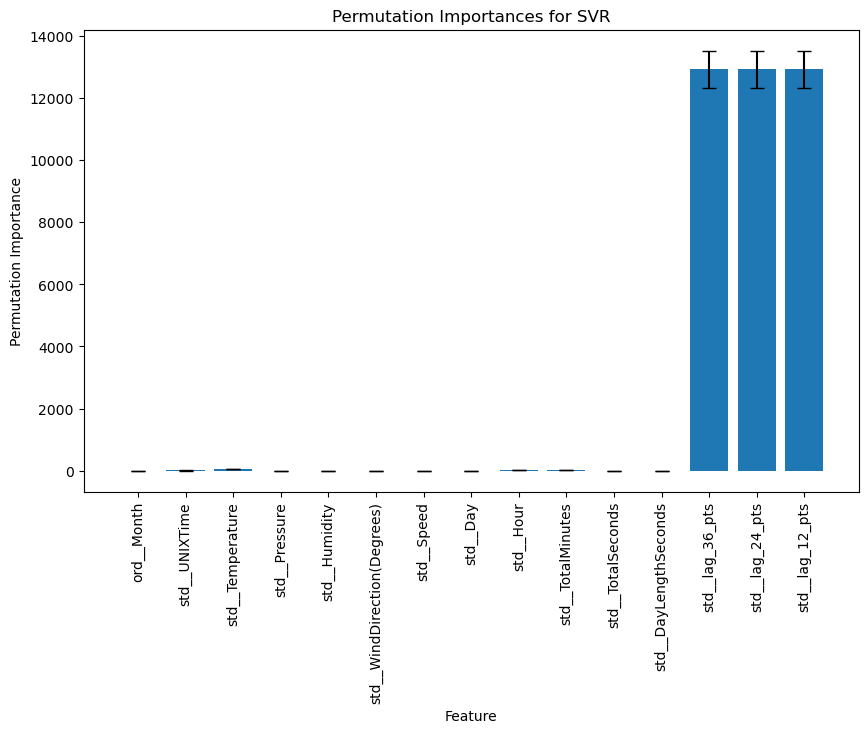

In [142]:
#Perm importances SVR

SVR_feature_importances = perm_importances[0].importances_mean

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(SVR_feature_importances)), SVR_feature_importances, yerr=perm_importances[0].importances_std, capsize=5, align="center")
plt.xticks(range(len(SVR_feature_importances)), feature_names, rotation='vertical')
plt.xlabel("Feature")
plt.ylabel("Permutation Importance")
plt.title("Permutation Importances for SVR")
plt.savefig('PI_SVR2.png', bbox_inches='tight', dpi=300)
plt.show()

In [285]:
# Load the saved grid from the pickle file
with open('results/XGBRegressor_grid.save', 'rb') as file:
    loaded_xgb = pickle.load(file)
#print(loaded_xgb)
xgb_X_test = loaded_xgb[1]
xgb_y_test_pred = loaded_xgb[2]
# Access the XGB model from the loaded object
xgb_model = loaded_xgb[0][1]
#print(xgb_model)

Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/200 [00:00<?, ?it/s]

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


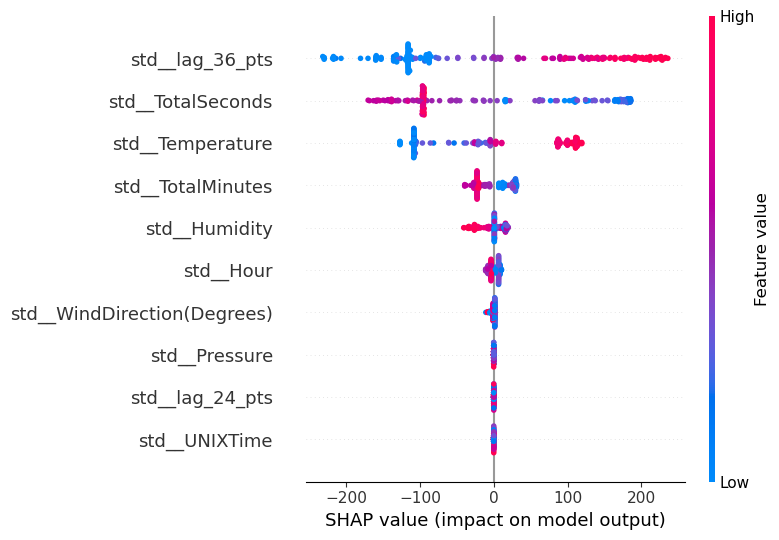

In [216]:
# global XBGR Shap
import shap
shap.initjs()

#feature names
feature_names = fitted_preprocessor.get_feature_names_out()

# Load the saved grid from the pickle file

#print(loaded_xgb)
xgb_model = loaded_xgb[0][1]['xgbregressor']

# Transform the test set
X_test_transformed = fitted_preprocessor.transform(X_test)

# Wrap the model inside the KernelExplainer
explainer = shap.KernelExplainer(model=xgb_model.predict, data=X_test_transformed[200:400])

# calculate shap values on the first 100 points in the test
shap_values = explainer.shap_values(X_test_transformed[200:400])

# shap summary plot
shap.summary_plot(shap_values, X_test_transformed[200:400], feature_names=feature_names, show=False, max_display=10)

plt.savefig('xgbr_800_shap_plot.png', dpi=300)

<Figure size 600x400 with 0 Axes>

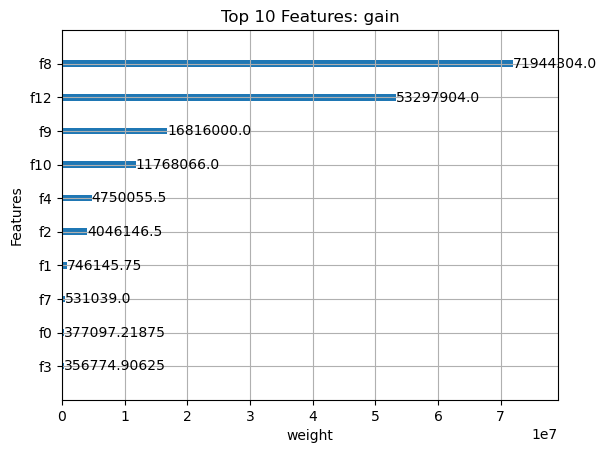

In [279]:
# Plot feature importance using XGBOOST
#metrics = ['gain','total_gain']
from xgboost import XGBRegressor
from xgboost import plot_importance

plt.figure(figsize=(6, 4))
plot_importance(xgb_model, importance_type='gain', max_num_features=10, xlabel='weight')
plt.title('Top 10 Features: gain')

plt.show()

  0%|          | 0/10 [00:00<?, ?it/s]

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


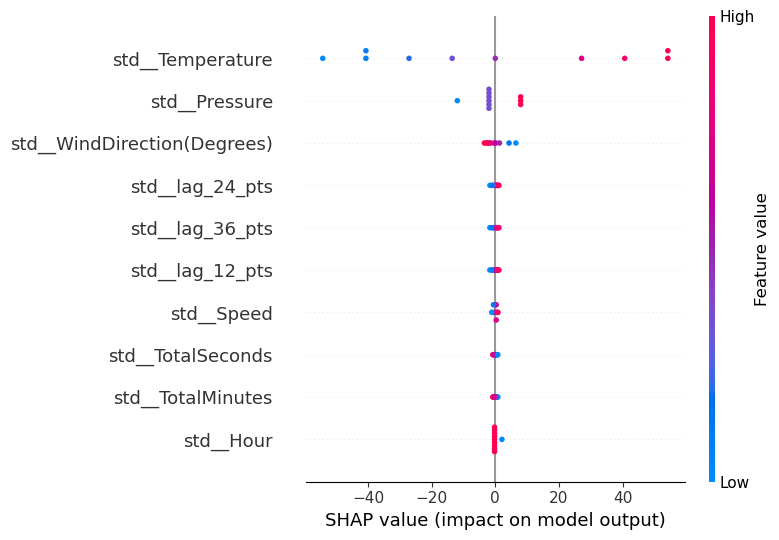

In [187]:
# global Ridge Shap
import shap
shap.initjs()

#feature names
feature_names = fitted_preprocessor.get_feature_names_out()

# Load the saved grid from the pickle file
with open('results/Ridge_grid.save', 'rb') as file:
    loaded_object = pickle.load(file)

# Access the ridge model from the loaded object
ridge_model = loaded_object[0][1]['ridge']

# Transform the test set
X_test_transformed = fitted_preprocessor.transform(X_test)

# Wrap the model inside the KernelExplainer
explainer = shap.KernelExplainer(model=ridge_model.predict, data=X_test_transformed[200:210])

# calculate shap values on the first 100 points in the test
shap_values = explainer.shap_values(X_test_transformed[200:210])

# shap summary plot
shap.summary_plot(shap_values, X_test_transformed[200:210], feature_names=feature_names, show=False, max_display=10)

# plt.savefig('images/ridge_100_shap_plot.png', dpi=300)

### Local Feature Importances

In [232]:
#local XBRG shap
index = 30
print('data point:', index,'; ' 'expected value', explainer.expected_value)
shap.force_plot(explainer.expected_value, shap_values[index,:], features = X_test_transformed[index,:],feature_names = feature_names, show=False,matplotlib=True).savefig('scratch.png')
#plt.show()
#plt.savefig('xgbr_800_local_shap_3.png', dpi=300)


data point: 30 ; expected value 347.2774303288758


In [248]:
#local XBRG shap (JUST SCREENSHOT)
index = 4
print('data point:', index,'; ' 'expected value', explainer.expected_value)
shap.force_plot(explainer.expected_value, shap_values[index,:], features = X_test_transformed[index,:],feature_names = feature_names)
#plt.savefig('xgbr_800_local_shap_70.png', dpi=300)

data point: 4 ; expected value 347.2774303288758


In [128]:
#local
index = 9
print('data point:', index,'; ' 'expected value', explainer.expected_value)
shap.force_plot(explainer.expected_value, shap_values[index,:], features = X_test_transformed[index,:],feature_names = feature_names)


data point: 9 ; expected value 140.64254072839654


### True vs Predicted Values

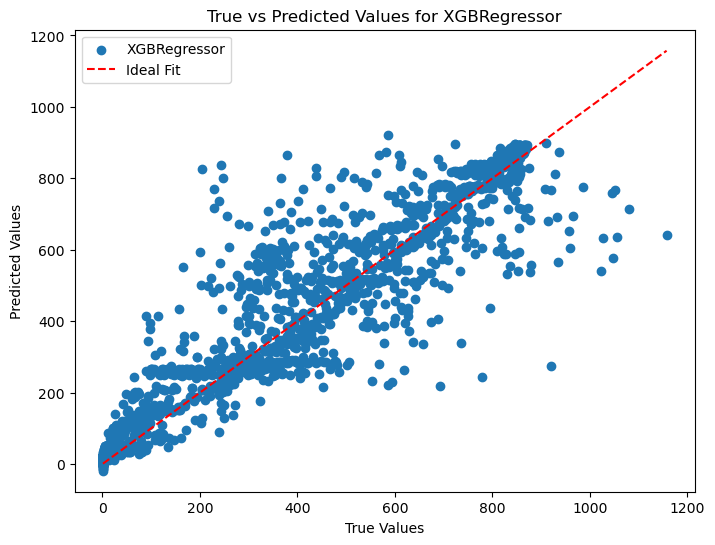

In [286]:
#Scatter plots

# Assuming y_test, y_test_pred, and model_names are available after running the models

plt.figure(figsize=(8, 6))
plt.scatter(y_test, xgb_model.predict(X_test), label='XGBRegressor')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Ideal Fit')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.title('True vs Predicted Values for XGBRegressor')
plt.savefig('scatter_plot.png', bbox_inches='tight', dpi=300)
plt.show()

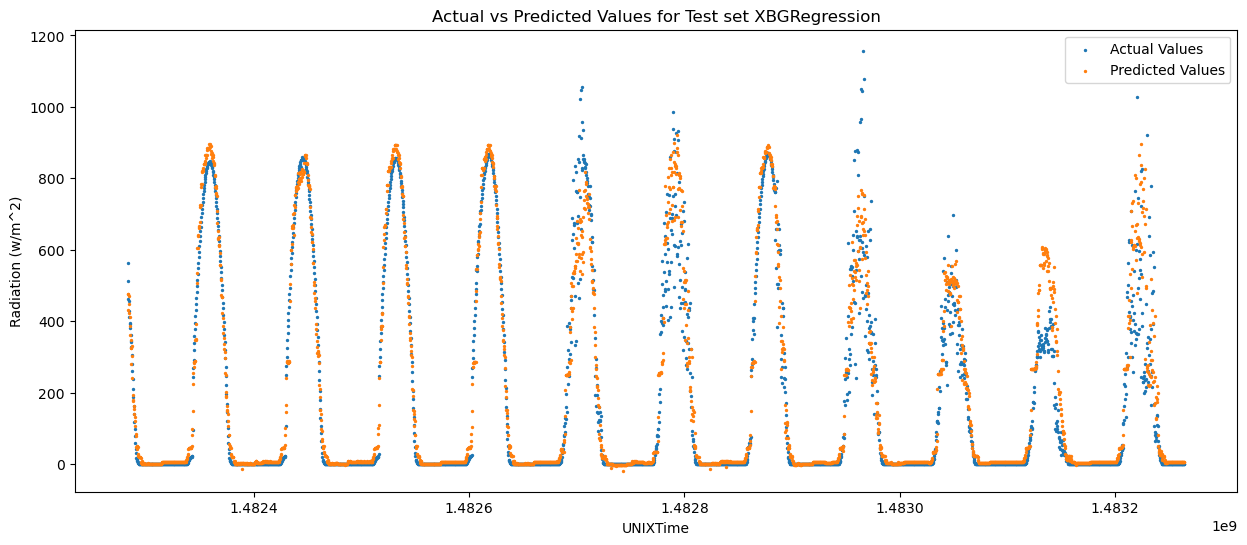

In [288]:
#Plot XGB Actual vs predicted values test

plt.figure(figsize=(15, 6))
plt.scatter(X_test.loc[:, 'UNIXTime'], y_test, label='Actual Values', marker='o', s=2)
plt.scatter(X_test.loc[:, 'UNIXTime'], xgb_model.predict(X_test), label='Predicted Values', marker='o', s=2)
plt.xlabel("UNIXTime")
plt.ylabel("Radiation (w/m^2)")
plt.title("Actual vs Predicted Values for Test set XBGRegression")
plt.legend()
plt.savefig('XGBR_Pred.png', bbox_inches='tight', dpi=300)
plt.show()